# Car brand recognition


In [77]:
#import the needed libraries
import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras import metrics
le = LabelEncoder() 


> **Post first modelling** <br>
I have noticed that the number 196 does not exist in the class names but is present in the data. I checked all the images that have this number but they were different car brands 
and since this appears to be a mistake in the data i will delete the 40 rows with this number <br>
**After spending a couple of hours on investigating the data I found that there is plenty of inaccurate data. Some of the pictures do not correspond to an accurate car brand and/or model. This is problem with the data that I cannot fix unless I spend countless hours in looking at every single picture out of the 8000+ and change the brand and model where necessary, but since I only have 1 week for this project I will only try to make the categories less.I will also not delete the 40 rows but make them accurate**

In [2]:
#Cars meta is the classification aka the different car models in the dataset
cars_meta = scipy.io.loadmat('data/car_devkit/car_devkit/devkit/cars_meta.mat')
class_names = cars_meta['class_names']  
class_names = np.transpose(class_names)
#Processing train data...
cars_annos = scipy.io.loadmat('data/car_devkit/car_devkit/devkit/cars_train_annos.mat')
annotations = cars_annos['annotations']
annotations = np.transpose(annotations)
annotations = annotations.flatten()

In [3]:
#get the x and y which in this case are the picture as an array and the car model
x = []
y = []
for annotation in annotations:
    picture_array = mpimg.imread(f'data/cars_train/cars_train/{annotation[5][0]}')
    picture_array = cv2.resize(picture_array, (32,32)).astype('float32')/255                    
    x.append(picture_array)
    y.append(annotation[4][0])

In [7]:
#define function that returns the indexes of an item in a list
def list_duplicates_of(seq,item):
    start_at = -1
    locs = []
    while True:
        try:
            loc = seq.index(item,start_at+1)
        except ValueError:
            break
        else:
            locs.append(loc)
            start_at = loc
    return locs

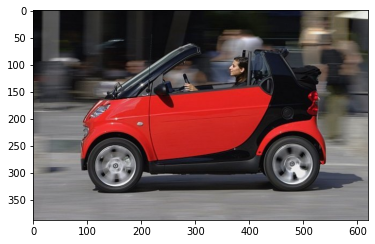

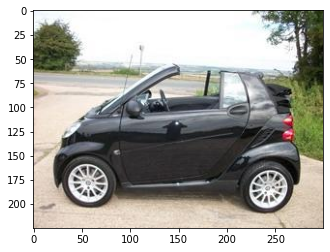

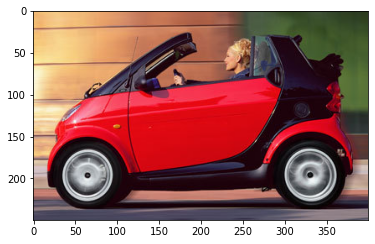

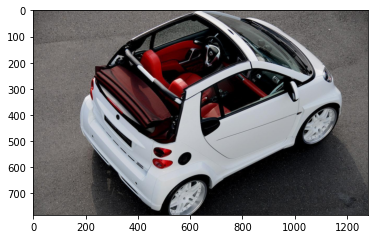

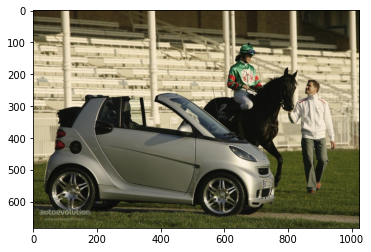

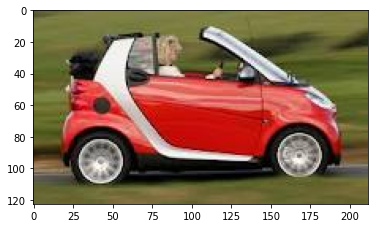

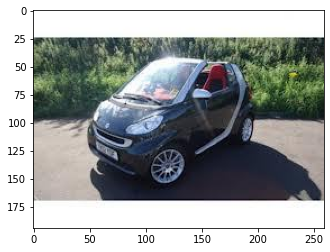

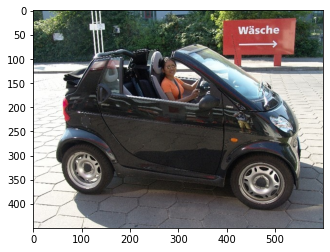

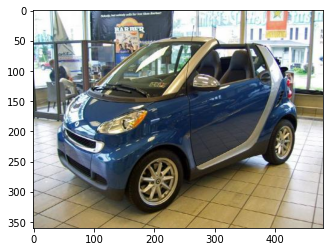

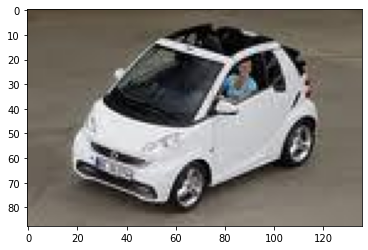

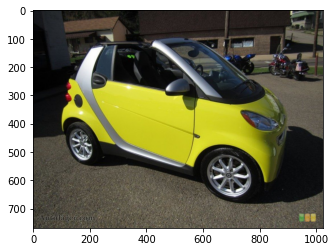

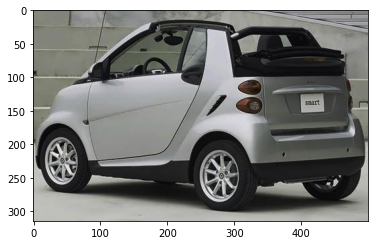

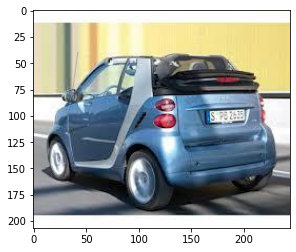

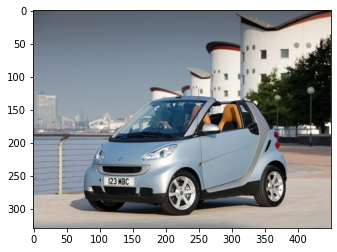

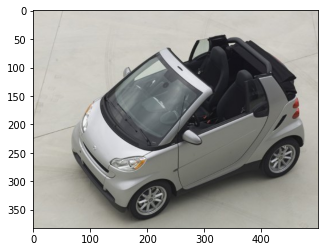

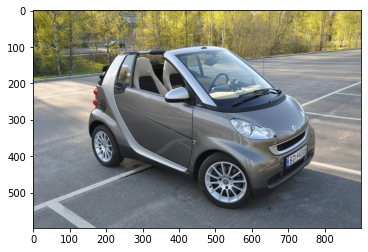

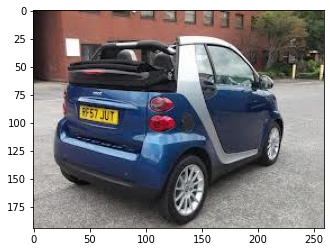

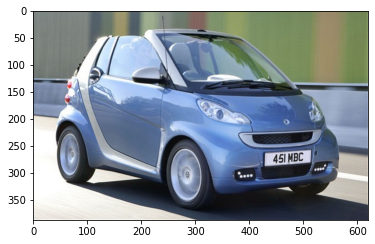

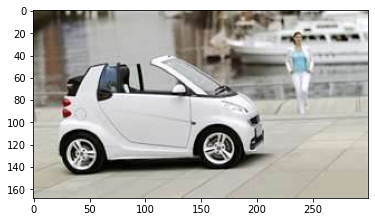

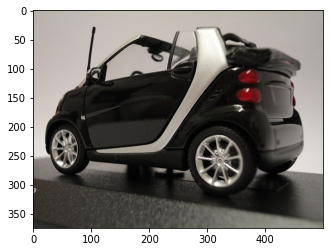

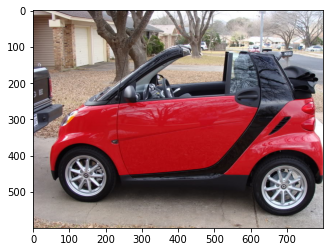

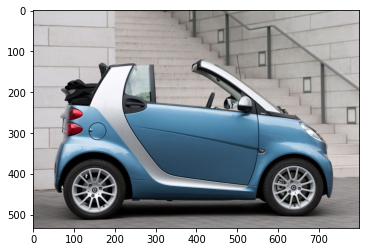

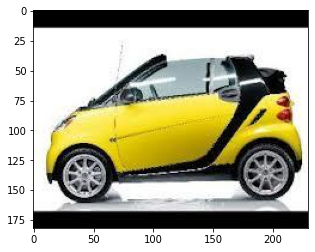

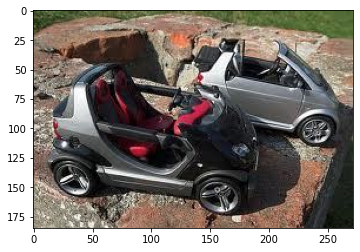

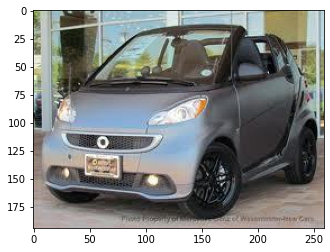

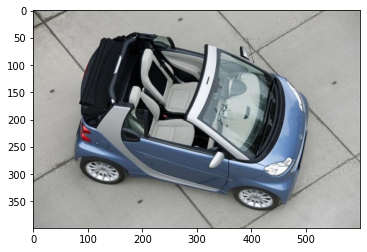

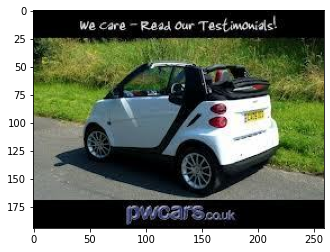

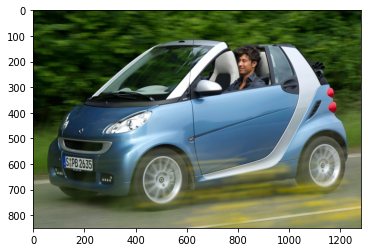

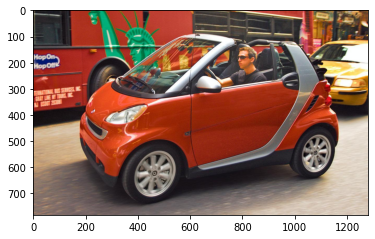

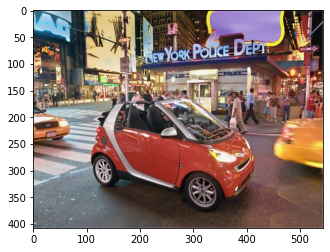

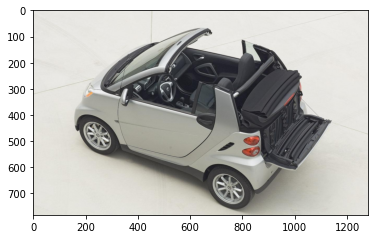

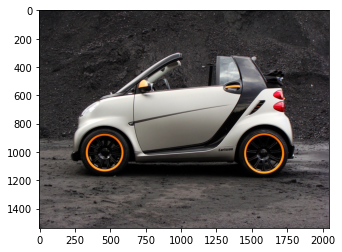

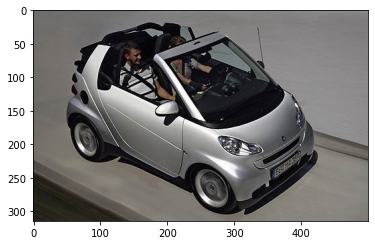

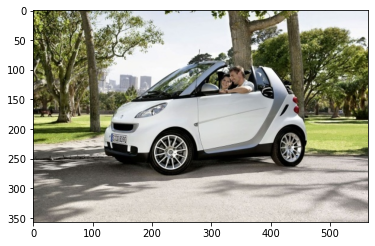

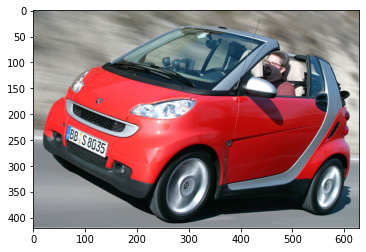

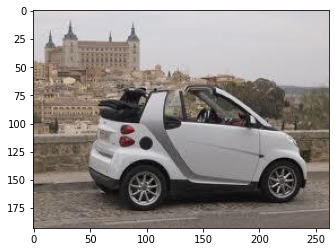

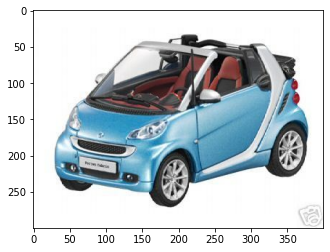

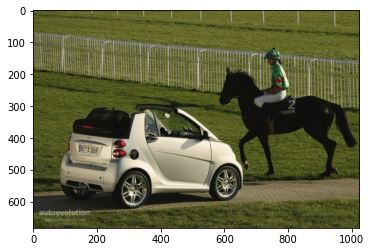

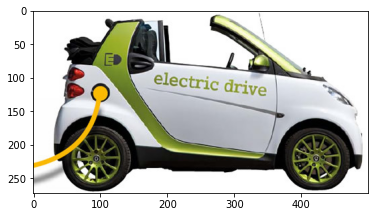

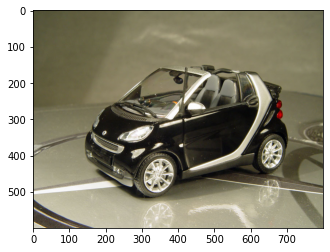

In [12]:
#This code gives all the images with class number - 196 which I can tell for sure that the brand is 'Smart' which is the 195 class number- let's change that
for i in list_duplicates_of(list(y), 196):
    #print(annotations[i][5])
    img = mpimg.imread(f'data/cars_train/cars_train/{annotations[i][5][0]}')
    plt.imshow(img)
    plt.show()

In [8]:
#This code changes all the classes in Y from 196(the 'Smart' cars) to 195 
for i in y:
    if i[0] == 196:
        i[0] = 195

In [9]:
#Check if it worked 
list_duplicates_of(list(y), 196)

[]

In [10]:
#Since in the data all the brand names are the first word of the string I make a new list with only the brand names
brand_names = []
for c in class_names:
    brand_names.append(c[0][0].split(' ')[0])

In [11]:
#Now I make a list with the brands without duplicated values
brand_names_no_dup = list(dict.fromkeys(brand_names))
print( brand_names_no_dup )

['AM', 'Acura', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge', 'Eagle', 'FIAT', 'Ferrari', 'Fisker', 'Ford', 'GMC', 'Geo', 'HUMMER', 'Honda', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Lamborghini', 'Land', 'Lincoln', 'MINI', 'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Plymouth', 'Porsche', 'Ram', 'Rolls-Royce', 'Scion', 'Spyker', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'smart']


In [12]:
#The list below contains lists of where each brand appears in the data - aka at which indexes
indexes = []
for brand_no_dup in brand_names_no_dup:
    indexes.append(list_duplicates_of(brand_names, brand_no_dup))

In [13]:
#This code goes over the Y label and saves the name of the brand into a new list that will be used for modelling
y_new = []
for i in y:
    for index in indexes:
        if i in index:
            y_new.append(brand_names[index[0]])
print(len(y_new))

8144


In [11]:
print(y_new)

['Audi', 'Acura', 'Dodge', 'Hyundai', 'Ford', 'HUMMER', 'Dodge', 'Dodge', 'Nissan', 'Chevrolet', 'Buick', 'Toyota', 'Hyundai', 'Dodge', 'Volvo', 'Porsche', 'Audi', 'Chevrolet', 'Volvo', 'Chevrolet', 'Chrysler', 'BMW', 'GMC', 'Nissan', 'Volvo', 'Hyundai', 'Tesla', 'Dodge', 'Suzuki', 'Volvo', 'Land', 'Hyundai', 'Chevrolet', 'Hyundai', 'Land', 'Fisker', 'Bentley', 'Eagle', 'Ford', 'Isuzu', 'Audi', 'Volkswagen', 'GMC', 'Bentley', 'Toyota', 'BMW', 'Volvo', 'Scion', 'Ram', 'Bentley', 'Dodge', 'Jeep', 'Audi', 'Eagle', 'Bentley', 'Chevrolet', 'Bugatti', 'Chevrolet', 'Dodge', 'HUMMER', 'Ford', 'Volkswagen', 'Ferrari', 'Toyota', 'Aston', 'Audi', 'Ford', 'Geo', 'Acura', 'BMW', 'Honda', 'Dodge', 'Ford', 'Ford', 'Toyota', 'Chevrolet', 'Ford', 'Bentley', 'Hyundai', 'Ford', 'Aston', 'Volvo', 'Audi', 'Ford', 'Buick', 'Jeep', 'Buick', 'Nissan', 'Audi', 'Ford', 'Mercedes-Benz', 'Hyundai', 'Rolls-Royce', 'Ford', 'Geo', 'Fisker', 'Chevrolet', 'Cadillac', 'BMW', 'Chevrolet', 'Volvo', 'Ford', 'Chevrolet', '

In [14]:
#I tried multiple ways to convert the 32,32 array into 32,32,3 but none of them worked so I will have to delete the 18 rows of data where the images are black and white
for t in x:
    if t.shape == (32,32):
        index = x.index(t)
        del x[index]
        del y_new[index]

<ipython-input-14-9b242ef1581b>:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  index = x.index(t)


In [15]:
#Now that all the arrays have the same shape we can convert the list into an array and then split the data intro train and test
X = np.array(x)
Y = np.array(y_new)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6500, 32, 32, 3), (6500,), (1626, 32, 32, 3), (1626,))

In [18]:
#Fit the label encoding
le_fitted = le.fit(Y)

In [19]:
#Apply label encoding 
y_train_le = le_fitted.transform(y_train)
y_test_le = le_fitted.transform(y_test)

In [20]:
y_train_one_hot = to_categorical(y_train_le)
y_test_one_hot = to_categorical(y_test_le)

In [58]:
#Create the models architecture
model = Sequential()

#Add the first layer
model.add(Conv2D(64, (5,5), activation='relu', input_shape=(32,32,3)))

#Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add a second convolution layer
model.add(Conv2D(64, (5,5), activation='relu'))

#Add a second pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add a flattening layer - reduce to linear array
model.add(Flatten())

#Create a layer with 1500 neurons
model.add(Dense(2000, activation='relu'))

#Add a dropout layer
model.add(Dropout(0.5))

#Add a layer with 700 neurons
model.add(Dense(1000, activation='relu'))

#Add a dropout layer
model.add(Dropout(0.5))

#Add a layer with 300 neurons
model.add(Dense(500, activation='relu'))

#Add a layer with 48 neurons
model.add(Dense(48, activation='softmax'))

In [59]:
#Compile the model
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [60]:
#Train the model - I decided to use less epoches because I noticed that after 40-50 there is no change
hist = model.fit(x_train, y_train_one_hot,
                 batch_size=256,
                 epochs = 40,
                 validation_split = 0.2)

Epoch 1/40
21/21 [==============================] - 4s 189ms/step - loss: 3.7140 - accuracy: 0.0817 - val_loss: 3.4452 - val_accuracy: 0.0762
Epoch 2/40
21/21 [==============================] - 4s 180ms/step - loss: 3.4598 - accuracy: 0.1006 - val_loss: 3.4202 - val_accuracy: 0.1238
Epoch 3/40
21/21 [==============================] - 4s 178ms/step - loss: 3.4435 - accuracy: 0.1069 - val_loss: 3.4603 - val_accuracy: 0.1238
Epoch 4/40
21/21 [==============================] - 4s 182ms/step - loss: 3.4478 - accuracy: 0.1051 - val_loss: 3.4148 - val_accuracy: 0.1238
Epoch 5/40
21/21 [==============================] - 4s 178ms/step - loss: 3.4356 - accuracy: 0.0994 - val_loss: 3.4096 - val_accuracy: 0.1238
Epoch 6/40
21/21 [==============================] - 4s 188ms/step - loss: 3.4101 - accuracy: 0.1066 - val_loss: 3.4073 - val_accuracy: 0.1238
Epoch 7/40
21/21 [==============================] - 4s 193ms/step - loss: 3.4005 - accuracy: 0.1116 - val_loss: 3.3956 - val_accuracy: 0.1238
Epoch 

In [61]:
#Evaluate model on test dataset
model.evaluate(x_test,y_test_one_hot)

51/51 [==============================] - 0s 8ms/step - loss: 9.5955 - accuracy: 0.0923


[9.595457077026367, 0.09225092083215714]

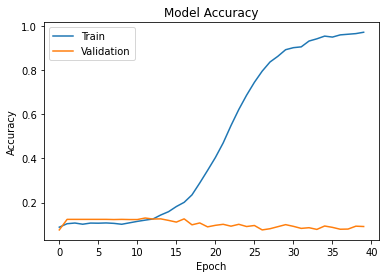

In [62]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

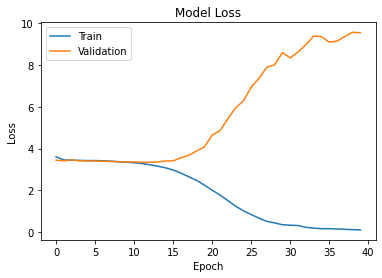

In [63]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [4]:
#Get new test data
#Processing test data...
cars_test_annos = scipy.io.loadmat('data/car_devkit/car_devkit/devkit/cars_test_annos.mat')
annotations_test = cars_test_annos['annotations']
annotations_test = np.transpose(annotations_test)

testing_pictures = []
for annotation in annotations_test:
    picture_array = mpimg.imread(f'data/cars_test/cars_test/{annotation[0][4][0]}')
    picture_array = cv2.resize(picture_array, (32,32)).astype('float32')/255
    testing_pictures.append(picture_array)

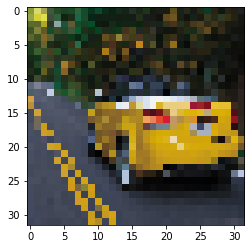

In [72]:
#Visualize a car from the test data to see what is its model - this is an audi
plt.imshow(testing_pictures[773])
plt.show()

In [73]:
#Get the model predictions on the image above
predictions = model.predict(np.array([testing_pictures[773]]))      
#Show predictions
predictions

array([[6.2797434e-09, 1.3974835e-07, 6.9179773e-01, 6.9123483e-04,
        2.5477523e-03, 4.7600390e-17, 2.3689921e-08, 1.5935507e-16,
        5.3861793e-03, 6.3790660e-11, 1.4102012e-12, 2.6157528e-07,
        1.3732852e-03, 4.8764754e-08, 2.9813725e-01, 1.7297999e-08,
        3.8419362e-10, 2.2711392e-12, 1.6463077e-15, 3.6998508e-11,
        3.3515175e-08, 1.9091007e-09, 1.6057566e-14, 2.5579474e-15,
        9.0459535e-20, 1.1112240e-13, 5.7591691e-08, 3.2357151e-05,
        7.3478699e-17, 1.0258967e-13, 8.6178694e-08, 1.6399583e-15,
        8.5365593e-18, 2.5557196e-05, 3.1226730e-18, 1.3302820e-11,
        3.3851240e-08, 2.8033867e-06, 3.2715183e-13, 3.6163210e-12,
        1.6870985e-15, 7.1681328e-10, 8.9223189e-09, 1.7379186e-12,
        3.4006137e-06, 1.8788811e-07, 1.5539491e-06, 2.9239534e-12]],
      dtype=float32)

In [74]:
#Sort the predictions from least to greatest
list_index = list(range(0,48))
p = predictions

for i in range(48):
    for j in range(48):
        if p[0][list_index[i]] > p[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
print(list_index)

[2, 14, 8, 4, 12, 3, 27, 33, 44, 37, 46, 11, 45, 1, 30, 26, 13, 36, 20, 6, 15, 42, 0, 21, 41, 16, 9, 19, 35, 39, 47, 17, 43, 10, 38, 25, 29, 22, 23, 40, 18, 31, 7, 28, 5, 32, 34, 24]


In [75]:
#print first 5 most likely classes by predictions
for i in range(5):
    print(le_fitted.classes_[list_index[i]], ':', round(predictions[0][list_index[i]] * 100), '%')

Audi : 69 %
Ferrari : 30 %
Chevrolet : 1 %
Bentley : 0 %
Eagle : 0 %


It did correctly predict the brand of the car.

**Evaluate on mean squared error**

In [87]:
y_pred = model.predict(x_test)

In [89]:
mse = metrics.MeanSquaredError()
mse.update_state(y_pred, y_test_one_hot)
mse.result().numpy()

0.029326262

Honestly there is probably something wrong with this result because there is no way that the evaluation above shows 9%  
while the MSE is that close to 0 but I could not figure out the reason for that and I would like to know your comment on it.

**After removing the car model and year of production which led to having almost 4 times less categories, I managed to improve
the accuracy percentage from 3 to 9% percent which might not be a lot but for the short period of time of the project in addition to the limited and sometimes wrong dataset I am happy with the final outcome.**